In [1]:
import os, csv
print (os.getcwd())

/Users/byungsagkim/opt/python


In [18]:
local_path = os.getcwd()
source = 'datasets/covtype.data'
SEP = ','
forest_type = {1:"Spruce/Fir", 2:"Lodgepole Pine", 3:"Ponderosa Pine", 4:"Cottonwood/Willow", \
              5:"Aspen", 6:"Douglas-fir", 7:"Krummholz"}
forest_type_count = {value:0 for value in forest_type.values()}
forest_type_count['Other'] = 0
lodgepole_pine = 0
spruce =0
proportions = list()
with open(local_path+'/'+source) as R:
    iterator = csv.reader(R, delimiter=SEP)
    for n, row in enumerate(iterator):
        response = int(row[-1]) # The response is the last value
        try:
            forest_type_count[forest_type[response]] += 1
            if response == 1:
                spruce += 1
            elif response == 2:
                lodgepole_pine += 1
            if n % 10000 == 0:
                proportions.append([spruce/float(n+1), \
                                   lodgepole_pine/float(n+1)])
        except:
            forest_type_count['Other'] += 1
    
    print(forest_type_count)
    print('Total rows: %i' % (n+1))
    print('Frequency of classes:')
    for ftype, freq in sorted([(t,v) for t,v \
                              in forest_type_count.items()], \
                              key = lambda x: x[1], reverse=True):
        print("%-18s: %6i %04.1f%%" % (ftype, freq, freq*100/float(n+1)))
    
                

{'Spruce/Fir': 211840, 'Lodgepole Pine': 283301, 'Ponderosa Pine': 35754, 'Cottonwood/Willow': 2747, 'Aspen': 9493, 'Douglas-fir': 17367, 'Krummholz': 20510, 'Other': 0}
Total rows: 581012
Frequency of classes:
Lodgepole Pine    : 283301 48.8%
Spruce/Fir        : 211840 36.5%
Ponderosa Pine    :  35754 06.2%
Krummholz         :  20510 03.5%
Douglas-fir       :  17367 03.0%
Aspen             :   9493 01.6%
Cottonwood/Willow :   2747 00.5%
Other             :      0 00.0%


In [43]:
print(forest_type_count.items())
print(forest_type_count.keys())
for ftype, freq in sorted([(t,v) for t,v \
                              in forest_type_count.items()], \
                              key = lambda x: x[0], reverse=True):
    print("%-18s: %6i %04.1f%%" % (ftype, freq, freq*100/float(n+1)))
        
print()
for ftype, freq in [(t,v) for t,v in forest_type_count.items()]:
    print("%-18s: %6i %04.1f%%" % (ftype, freq, freq*100/float(n+1)))
        
print()
for ftype, freq in sorted([(t,v) for t,v in forest_type_count.items()]):
    print("%-18s: %6i %04.1f%%" % (ftype, freq, freq*100/float(n+1)))



dict_items([('Spruce/Fir', 211840), ('Lodgepole Pine', 283301), ('Ponderosa Pine', 35754), ('Cottonwood/Willow', 2747), ('Aspen', 9493), ('Douglas-fir', 17367), ('Krummholz', 20510), ('Other', 0)])
dict_keys(['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz', 'Other'])


NameError: name 'v' is not defined

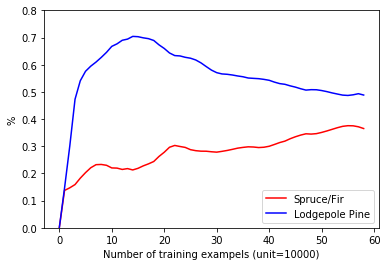

In [17]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
proportions = np.array(proportions)
plt.plot(proportions[:,0], 'r-', label='Spruce/Fir')
plt.plot(proportions[:,1], 'b-', label='Lodgepole Pine')
plt.ylim(0.0,0.8)
plt.xlabel('Number of training exampels (unit=10000)')
plt.ylabel('%')
plt.legend(loc='lower right', numpoints=1)
plt.show()

## lambda function ##

In [19]:
def short_function(x):
    return x*2
equiv_anon = lambda x:x*2

In [20]:
def apply_to_list(some_list,f):
    return [f(x) for x in some_list]

ints = [4,0,1,5,6]
apply_to_list(ints, lambda x:x*2)

[8, 0, 2, 10, 12]

In [41]:
strings = ['foo', 'card', 'bar', 'aaaa', 'abab']
strings.sort(key = lambda x: len(set(list(x))))
strings

['aaaa', 'foo', 'abab', 'bar', 'card']